In [1]:
from modelicapy import cleanData as cld
from buildingspy.io.outputfile import Reader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r = Reader('data/dsres.mat','dymola')

tstart = 60
tstop = 475200
nt = 7920+1-60

varNames_param_base=[]
varNames_var_base=[]
for i, val in enumerate(r.varNames()):
    if np.size(r.values(val)) == 4:
        varNames_param_base.append(val)
    else:      
        varNames_var_base.append(val)

varNames_param = varNames_param_base
varNames_var = varNames_var_base

params = cld.cleanDataParam(r,varNames_param)
data = cld.cleanDataTime(r,varNames_var,tstart,tstop,nt)

# # Normalize data
# data_norm = {}
# for i, val in enumerate(data):
#     data_norm[val] = data[val]/max(abs(data[val]))

In [3]:
import re
 
# Declare the filter function
def Filter(datalist,regexp):
    # Search data based on regular expression in the list
    return [val for val in datalist if re.search(regexp, val)]

# Print the filter data
# vrs = data.keys()
vrs = params.keys()
print(Filter(vrs,'^data.m_flow'))

['data.m_flow', 'data.m_flow_EXT', 'data.m_flow_INT', 'data.m_flow_compressor1', 'data.m_flow_compressor2', 'data.m_flow_coolerBypass', 'data.m_flow_cooler_cold', 'data.m_flow_cooler_hot', 'data.m_flow_htr_cold', 'data.m_flow_htr_hot', 'data.m_flow_ltr_cold', 'data.m_flow_ltr_hot', 'data.m_flow_rhx_cold', 'data.m_flow_rhx_hot', 'data.m_flow_turbine', 'data.m_flow_turbineBypass']


In [4]:
saveDirectory = 'plots'

In [5]:
time = data['time']/60/60/24

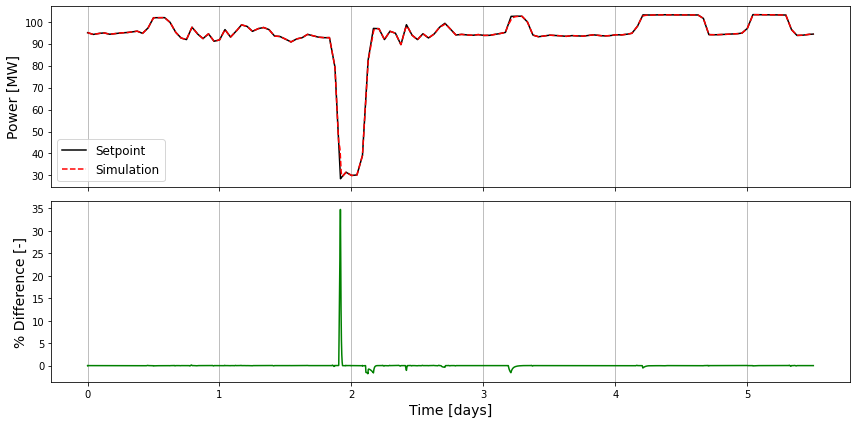

In [6]:
W_setpoint = data['W_electricity_setpoint.y[1]']*params['data.W_electricity']/1e6
W_measured = data['generator.power']/1e6
W_diff = (W_measured-W_setpoint)/W_setpoint

plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=14)

fig,ax = plt.subplots(2,sharex=True,figsize=(12,6))
ax[0].plot(time,W_setpoint,'k-',label="Setpoint")
ax[0].plot(time,W_measured,'r--',label="Simulation")
ax[1].plot(time,W_diff*100,'g')

ax[0].legend(fontsize='large')
ax[0].set(ylabel='Power [MW]');
ax[1].set(ylabel="% Difference [-]")
ax[1].set(xlabel="Time [days]")

for a in ax:
    a.grid(axis='x')

plt.tight_layout()
fig.savefig('{}/W_sVSm'.format(saveDirectory),dpi=300)

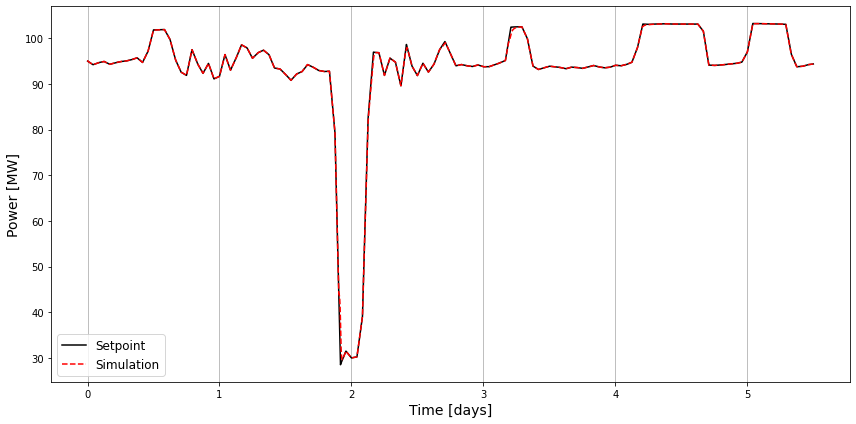

In [45]:
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=14)

fig,ax = plt.subplots(sharex=True,figsize=(12,6))
ax.plot(time,W_setpoint,'k-',label="Setpoint")
ax.plot(time,W_measured,'r--',label="Simulation")

ax.legend(fontsize='large')
ax.set(ylabel='Power [MW]');
ax.set(xlabel="Time [days]")

ax.grid(axis='x')

plt.tight_layout()
fig.savefig('{}/W_sVSm_noDiff'.format(saveDirectory),dpi=300)

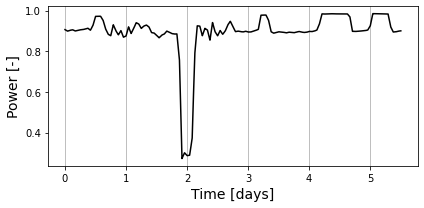

In [40]:
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=14)

fig,ax = plt.subplots(sharex=True,figsize=(6,3))
ax.plot(time,data['W_electricity_setpoint.y[1]'],'k-',label="Setpoint")

ax.set(ylabel='Power [-]');
ax.set(xlabel="Time [days]")
ax.grid(axis='x')

plt.tight_layout()
fig.savefig('{}/W_setpointNorm'.format(saveDirectory),dpi=300)

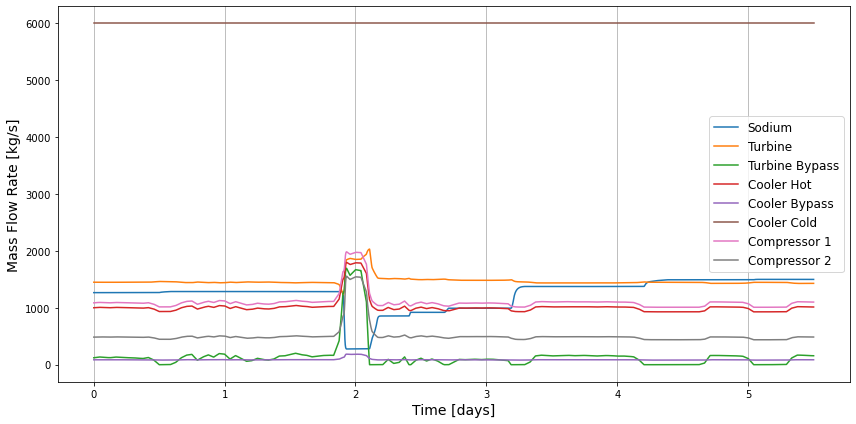

In [7]:
m_flow_rhx_hot = data['rhx.port_a1.m_flow']#/params['data.m_flow_rhx_hot']
m_flow_rhx_cold = data['rhx.port_a2.m_flow']#/params['data.m_flow_rhx_cold']
m_flow_turbineBypass = data['valve_turbineBypass.m_flow']
m_flow_cooler_hot = data['cooler.port_a1.m_flow']
m_flow_coolerBypass = data['valve_coolerBypass.m_flow']
m_flow_compressor1 = data['compressor1.m_flow']
m_flow_compressor2 = data['compressor2.m_flow']

m_flow_cooler_cold = params['cooler.port_a2.m_flow']

plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=14)

fig,ax = plt.subplots(1,sharex=True,figsize=(12,6))
ax.plot(time,m_flow_rhx_hot,label="Sodium")
ax.plot(time,m_flow_rhx_cold,label="Turbine")
ax.plot(time,m_flow_turbineBypass,label="Turbine Bypass")
ax.plot(time,m_flow_cooler_hot,label="Cooler Hot")
ax.plot(time,m_flow_coolerBypass,label="Cooler Bypass")
ax.plot((0,time[-1]),(m_flow_cooler_cold,m_flow_cooler_cold),label="Cooler Cold")
ax.plot(time,m_flow_compressor1,label="Compressor 1")
ax.plot(time,m_flow_compressor2,label="Compressor 2")

ax.legend(fontsize='large')
ax.set(ylabel='Mass Flow Rate [kg/s]');
ax.set(xlabel="Time [days]")
ax.grid(axis='x')

plt.tight_layout()
fig.savefig('{}/m_flows'.format(saveDirectory),dpi=300)

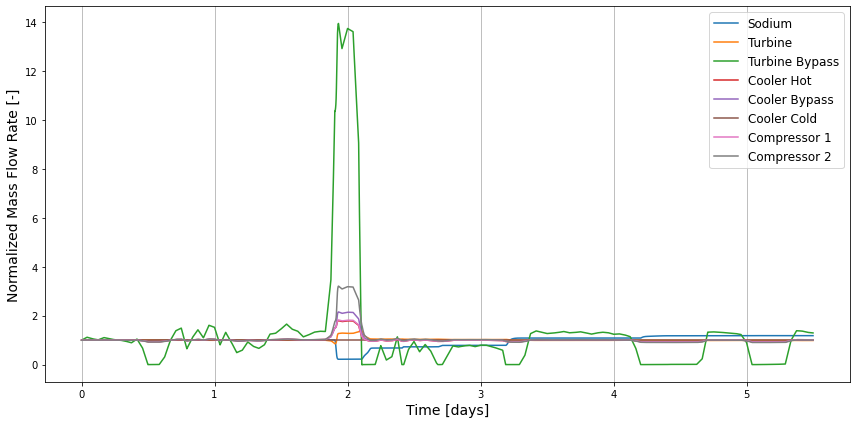

In [8]:
m_flow_rhx_hot_norm = m_flow_rhx_hot/m_flow_rhx_hot[0]
m_flow_rhx_cold_norm = m_flow_rhx_cold/m_flow_rhx_cold[0]
m_flow_turbineBypass_norm = m_flow_turbineBypass/m_flow_turbineBypass[0]
m_flow_cooler_hot_norm = m_flow_cooler_hot/m_flow_cooler_hot[0]
m_flow_coolerBypass_norm = m_flow_coolerBypass/m_flow_coolerBypass[0]
m_flow_compressor1_norm = m_flow_compressor1/m_flow_compressor1[0]
m_flow_compressor2_norm = m_flow_compressor2/m_flow_compressor2[0]

m_flow_cooler_cold_norm = params['cooler.port_a2.m_flow']/params['data.m_flow_cooler_cold']

plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=14)

fig,ax = plt.subplots(1,sharex=True,figsize=(12,6))
ax.plot(time,m_flow_rhx_hot_norm,label="Sodium")
ax.plot(time,m_flow_rhx_cold_norm,label="Turbine")
ax.plot(time,m_flow_turbineBypass_norm,label="Turbine Bypass")
ax.plot(time,m_flow_cooler_hot_norm,label="Cooler Hot")
ax.plot(time,m_flow_coolerBypass_norm,label="Cooler Bypass")
ax.plot((0,time[-1]),(m_flow_cooler_cold_norm,m_flow_cooler_cold_norm),label="Cooler Cold")
ax.plot(time,m_flow_compressor1_norm,label="Compressor 1")
ax.plot(time,m_flow_compressor2_norm,label="Compressor 2")

ax.legend(fontsize='large')
ax.set(ylabel='Normalized Mass Flow Rate [-]');
ax.set(xlabel="Time [days]")
ax.grid(axis='x')

plt.tight_layout()
fig.savefig('{}/m_flows_norm'.format(saveDirectory),dpi=300)

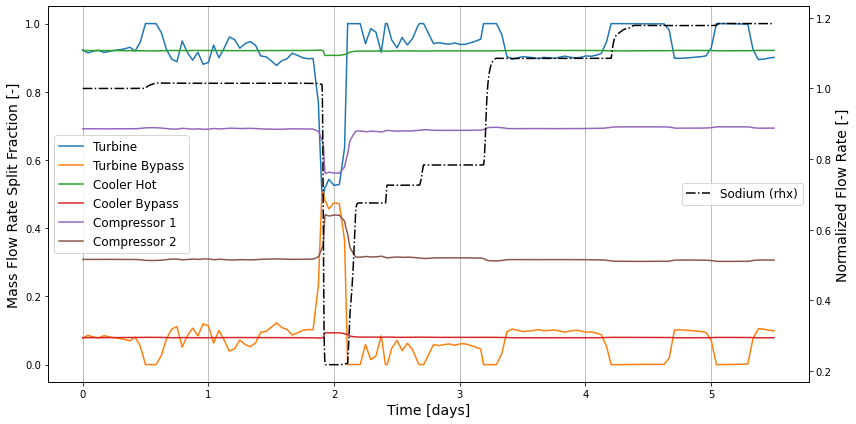

In [53]:
m_flow_rhx_cold_split = m_flow_rhx_cold/(m_flow_rhx_cold+m_flow_turbineBypass)
m_flow_turbineBypass_split = m_flow_turbineBypass/(m_flow_rhx_cold+m_flow_turbineBypass)
m_flow_cooler_hot_split = m_flow_cooler_hot/(m_flow_cooler_hot+m_flow_coolerBypass)
m_flow_coolerBypass_split = m_flow_coolerBypass/(m_flow_cooler_hot+m_flow_coolerBypass)
m_flow_compressor1_split = m_flow_compressor1/(m_flow_compressor1+m_flow_compressor2)
m_flow_compressor2_split = m_flow_compressor2/(m_flow_compressor1+m_flow_compressor2)

plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=14)

fig,ax = plt.subplots(1,sharex=True,figsize=(12,6))

ax.plot(time,m_flow_rhx_cold_split,label="Turbine")
ax.plot(time,m_flow_turbineBypass_split,label="Turbine Bypass")
ax.plot(time,m_flow_cooler_hot_split,label="Cooler Hot")
ax.plot(time,m_flow_coolerBypass_split,label="Cooler Bypass")
ax.plot(time,m_flow_compressor1_split,label="Compressor 1")
ax.plot(time,m_flow_compressor2_split,label="Compressor 2")

ax2 = ax.twinx()
ax2.plot(time, m_flow_rhx_hot_norm,'k-.',label='Sodium (rhx)')
ax2.set(ylabel='Normalized Flow Rate [-]')
ax2.legend(fontsize='large',loc='right')
ax.legend(fontsize='large',loc='center left')

ax.set(ylabel='Mass Flow Rate Split Fraction [-]');
ax.set(xlabel="Time [days]")
ax.grid(axis='x')

plt.tight_layout()
fig.savefig('{}/m_flows_split'.format(saveDirectory),dpi=300)

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 89299.162157, 567.850413 with index (6,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [35.847109,2447899.704774]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 89299.162157, 578.855966 with index (7,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [140.753923,2436525.023736]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 89299.162157, 589.861520 with index (8,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [245.660737,2425161.502458]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 89299.162157, 600.867073 wi

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 146622.430121, 842.989252 with index (31,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [135.731902,2164355.383291]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 146622.430121, 853.994805 with index (32,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [240.638716,2153258.681597]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 146622.430121, 865.000359 with index (33,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [345.545530,2142172.932567]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 146622.430121, 876.0

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 203945.698085, 1096.116983 with index (54,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [25.803067,1909322.519614]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 203945.698085, 1107.122537 with index (55,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [130.709881,1898468.733777]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 203945.698085, 1118.128090 with index (56,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [235.616695,1887624.919319]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 203945.698085, 112

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 261268.966049, 1360.250269 with index (78,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [20.781046,1648902.364763]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 261268.966049, 1371.255822 with index (79,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [125.687860,1638264.755948]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 261268.966049, 1382.261376 with index (80,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [230.594674,1627634.830831]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 261268.966049, 139

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 318592.234013, 1657.400215 with index (105,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [330.479467,1361404.150269]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 318592.234013, 1668.405768 with index (106,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [435.386282,1350915.608485]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 318592.234013, 1679.411322 with index (107,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [540.293096,1340429.674933]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 318592.234013,

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 375915.501977, 1888.516839 with index (126,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [10.737004,1138782.191091]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 375915.501977, 1899.522393 with index (127,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [115.643818,1128284.302019]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 375915.501977, 1910.527946 with index (128,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [220.550632,1117781.987118]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 375915.501977, 

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 433238.769941, 2207.677893 with index (155,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [15.102836,828151.798320]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 433238.769941, 2218.683446 with index (156,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [33.697158,817303.558571]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 433238.769941, 2229.689000 with index (157,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [51.370648,806432.921000]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 433238.769941, 2240.

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 523145.423742, 501.817091 with index (0,): unable to solve 1phase PY flash with Tmin=216.592, Tmax=216.821 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [22.0849 J/mol/K] is below the minimum value of 22.942626938 J/mol/K
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 523145.423742, 512.822645 with index (1,): unable to solve 1phase PY flash with Tmin=216.592, Tmax=216.821 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [22.5692 J/mol/K] is below the minimum value of 22.942626938 J/mol/K
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 669683.184550, 501.817091 with index (0,): unable to solve 1phase PY flash with Tmin=216.623, Tmax=222.69

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 10129452.971524, 501.817091 with index (0,): unable to solve 1phase PY flash with Tmin=218.626, Tmax=3000 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [22.0849 J/mol/K] is below the minimum value of 22.6845227911 J/mol/K
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 10129452.971524, 512.822645 with index (1,): unable to solve 1phase PY flash with Tmin=218.626, Tmax=3000 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [22.5692 J/mol/K] is below the minimum value of 22.6845227911 J/mol/K
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 12966804.287794, 501.817091 with index (0,): unable to solve 1phase PY flash with Tmin=219.22, Tmax=3000 

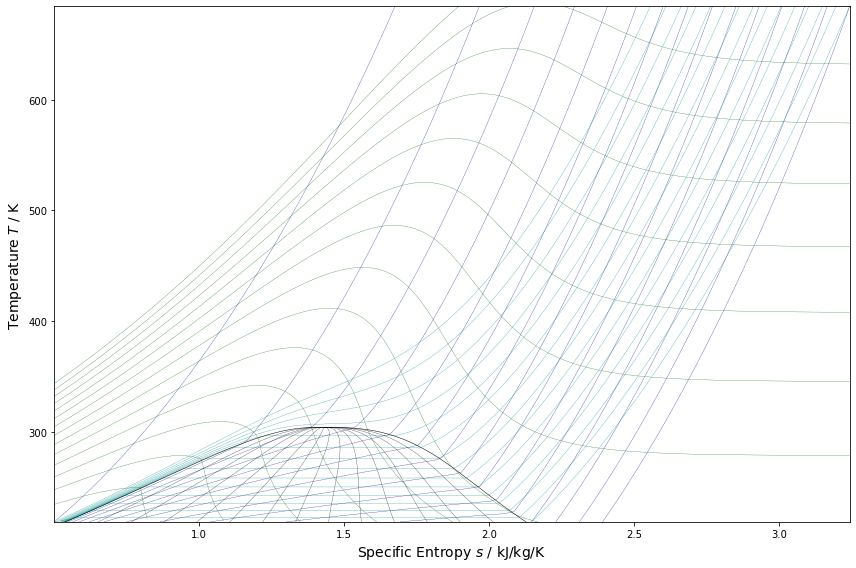

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


In [10]:
plt.rcParams["figure.figsize"] = (12,8)

import CoolProp
from CoolProp.Plots import PropertyPlot
diagram = PropertyPlot('co2', 'TS')
diagram.calc_isolines()
diagram.show()
diagram.savefig('{}/co2_TS'.format(saveDirectory),dpi=300)

In [11]:
def combineLists(first_list, second_list):
    # Combines lists keeping the order of the first_list and removing duplicates
    
    in_first = set(first_list)
    in_second = set(second_list)

    in_second_but_not_in_first = in_second - in_first

    result = first_list + list(in_second_but_not_in_first)
    return result

In [12]:
# htr_cold_a to ltr_hot_b
cycle1 = ['sensor_htr_cold_a','sensor_rhx_cold_a','sensor_turbine_a','sensor_turbine_b','sensor_htr_hot_a',
          'sensor_ltr_hot_a','sensor_ltr_hot_b']
labels1 = ['HTR Cold-Side Inlet',
           'RHX Cold-Side Inlet',
           'Turbine Inlet',
           'Turbine Outlet',
           'HTR Hot-Side Inlet',
           'LTR Hot-Side Inlet',
           'LTR Hot-Side Outlet']

# ltr_hot_b to htr_cold_a - compressor1
cycle2 = ['sensor_ltr_hot_b','sensor_cooler_hot_b','sensor_compressor1_a','sensor_compressor1_b',
          'sensor_ltr_cold_b','sensor_htr_cold_a']
labels2 = ['LTR Hot-Side Outlet',
           'Cooler Hot-Side Outlet',
           'Compressor 1 Inlet',
           'Compressor 1 Outlet',
           'LTR Cold-Side Inlet',
           'HTR Cold-Side Inlet']

# ltr_hot_b to htr_cold_a - compressor2
cycle3 = ['sensor_ltr_hot_b','sensor_compressor2_b','sensor_htr_cold_a']
labels3 = ['LTR Hot-Side Outlet',
           'Compressor 2 Outlet',
           'HTR Cold-Side Inlet']

cycleCombined = combineLists(cycle1,cycle2)
cycleCombined = combineLists(cycleCombined,cycle3)

In [13]:
cycles = [cycle1,cycle2,cycle3]
labels = [labels1,labels2,labels3]
cycleColors = ['r','b','g']

nCPUs = 8
nTimes = int(np.ceil(len(time)/nCPUs))

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
     
timeSet = list(chunks(time,nTimes))

In [14]:
from multiprocessing import Pool
import timePlots # this is required for jupyter notebook

pool = Pool(nCPUs)

iTimeOffset = 0
results1={}
for i, tSet in enumerate(timeSet):
    results1[i] = pool.apply_async(timePlots.plotSeries_TS, [data,tSet,cycles,labels,cycleColors,cycleCombined,saveDirectory,iTimeOffset,300]) 
    iTimeOffset = iTimeOffset + len(tSet)

In [38]:
import importlib
importlib.reload(timePlots)

W_setpoint = data['W_electricity_setpoint.y[1]']*params['data.W_electricity']/1e6
W_measured = data['generator.power']/1e6

iTimesArray = np.linspace(0,len(time)-1,len(time))
iTimesSet = list(chunks(iTimesArray,nTimes))

results2={}
for i, iTimes in enumerate(iTimesSet):
    results2[i] = pool.apply_async(timePlots.plotSeries_SvsM, [iTimes.astype(int),time,W_setpoint,W_measured,saveDirectory,300])

In [43]:
iTimes = [7860]
showTimebox = False

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 89299.162157, 567.850413 with index (6,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [35.847109,2447899.704774]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 89299.162157, 578.855966 with index (7,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [140.753923,2436525.023736]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 89299.162157, 589.861520 with index (8,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [245.660737,2425161.502458]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 89299.162157, 600.867073 wi

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 146622.430121, 831.983698 with index (30,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [30.825088,2175463.060555]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 146622.430121, 842.989252 with index (31,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [135.731902,2164355.383291]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 146622.430121, 853.994805 with index (32,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [240.638716,2153258.681597]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 146622.430121, 865.00

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 203945.698085, 1096.116983 with index (54,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [25.803067,1909322.519614]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 203945.698085, 1107.122537 with index (55,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [130.709881,1898468.733777]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 203945.698085, 1118.128090 with index (56,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [235.616695,1887624.919319]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 203945.698085, 112

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 261268.966049, 1360.250269 with index (78,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [20.781046,1648902.364763]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 261268.966049, 1371.255822 with index (79,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [125.687860,1638264.755948]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 261268.966049, 1382.261376 with index (80,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [230.594674,1627634.830831]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 261268.966049, 139

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 318592.234013, 1624.383554 with index (102,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [15.759025,1392887.934873]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 318592.234013, 1635.389108 with index (103,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [120.665839,1382390.068488]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 318592.234013, 1646.394661 with index (104,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [225.572653,1371895.554290]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 318592.234013, 

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 375915.501977, 1888.516839 with index (126,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [10.737004,1138782.191091]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 375915.501977, 1899.522393 with index (127,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [115.643818,1128284.302019]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 375915.501977, 1910.527946 with index (128,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [220.550632,1117781.987118]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 375915.501977, 

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 433238.769941, 2207.677893 with index (155,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [15.102836,828151.798320]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 433238.769941, 2218.683446 with index (156,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [33.697158,817303.558571]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 433238.769941, 2229.689000 with index (157,): Inputs in Brent [216.592000,2020.000000] do not bracket the root.  Function values are [51.370648,806432.921000]
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 433238.769941, 2240.

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 523145.423742, 501.817091 with index (0,): unable to solve 1phase PY flash with Tmin=216.592, Tmax=216.821 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [22.0849 J/mol/K] is below the minimum value of 22.942626938 J/mol/K
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 523145.423742, 512.822645 with index (1,): unable to solve 1phase PY flash with Tmin=216.592, Tmax=216.821 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [22.5692 J/mol/K] is below the minimum value of 22.942626938 J/mol/K
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 669683.184550, 501.817091 with index (0,): unable to solve 1phase PY flash with Tmin=216.623, Tmax=222.69

C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 10129452.971524, 501.817091 with index (0,): unable to solve 1phase PY flash with Tmin=218.626, Tmax=3000 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [22.0849 J/mol/K] is below the minimum value of 22.6845227911 J/mol/K
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 10129452.971524, 512.822645 with index (1,): unable to solve 1phase PY flash with Tmin=218.626, Tmax=3000 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [22.5692 J/mol/K] is below the minimum value of 22.6845227911 J/mol/K
  warnings.warn(
C:\Users\vmg\Anaconda3\lib\site-packages\CoolProp\Plots\Common.py:655: UserWarning: An error occurred for inputs 12966804.287794, 501.817091 with index (0,): unable to solve 1phase PY flash with Tmin=219.22, Tmax=3000 

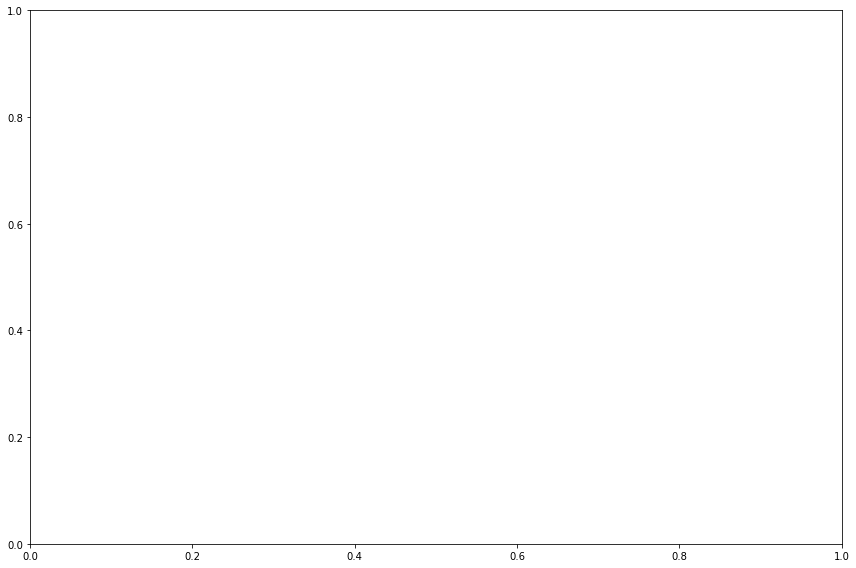

In [42]:
# Time sequence plot for State Points on T-S Diagram - Not parallelized - good for testing
if True:
    import CoolProp
    from CoolProp.Plots import PropertyPlot
    from CoolProp.CoolProp import PropsSI
    import seaborn as sns

    cycles = [cycle1,cycle2,cycle3]
    labels = [labels1,labels2,labels3]

    cycleColors = ['r','b','g']

    # Text box style for time indicator
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # Set medium
    medium = 'co2'

    # Set figure size 
    plt.rcParams["figure.figsize"] = (12,8)

    # Instantiate diagram
    diagram = PropertyPlot('co2', 'TS')
    diagram.calc_isolines()

    # Set colors so they do not repeat
    colors = sns.color_palette("hls", len(cycleCombined))

    # Time loop
    
    for iTime in iTimes:
        tVal = time[iTime]
        diagram.axis.set_prop_cycle('color', colors)
        # Cycle Loop
        for iCycle, cycle in enumerate(cycles):
            T = []
            p = []
            s = []
            for sensor in cycle:
                T.append(data['{}.T'.format(sensor)])
                p.append(data['{}.p'.format(sensor)])
                s.append(PropsSI('S','T',T[-1],'P',p[-1],medium))

            TT = np.array(T)
            ss = np.array(s)
            pp = np.array(p)

            x = ss[:,iTime]/1000
            y = TT[:,iTime]

            u = np.diff(x)
            v = np.diff(y)
            pos_x = x[:-1] + u/2
            pos_y = y[:-1] + v/2
            norm = np.sqrt(u**2+v**2) 

            # Create lines with arrows
            diagram.axis.plot(x,y,cycleColors[iCycle])#,label=sensor)        
            diagram.axis.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid",scale=100)

            # Create state point plots
            for i, sensor in enumerate(cycle):
                if iCycle > 0 and i == 0:
                    pass
                elif iCycle > 0 and i == len(cycle)-1:
                    pass
                else:
                    diagram.axis.plot(x[i],y[i],'o',label=labels[iCycle][i],markersize=10,zorder=6)

        # Update the figure and save
        diagram.axis.legend(loc='upper left',prop={'family': 'monospace'})
        diagram.axis.set(xlabel='Specific Entropy [kJ/kg-K]');
        diagram.axis.set(ylabel="Temperature [K]")
        if showTimebox:
            diagram.axis.text(0.5, 0.95, 'Time [day] = {:0.3f}'.format(tVal), transform=diagram.axis.transAxes, fontsize=14, ha='center', va='top', bbox=props)

        diagram.figure
        diagram.savefig('{}/notParallel/time_TS_{}.png'.format(saveDirectory,iTime),dpi=300)
        diagram.axis.clear()

In [44]:
# Time sequence for Setpoint vs Measured Signal - Not parallelized - good for testing
if True:
    # Time loop
    for iTime in iTimes:
        tVal = time[iTime]
        
        fig,ax = plt.subplots(figsize=(6,3))
        ax.plot(time,W_setpoint,'k-',label='Setpoint')
        ax.plot(time[:iTime],W_measured[:iTime],'r--',label='Simulation',linewidth=0.75)
        plt.axvline(x=time[iTime],color='fuchsia',linewidth='0.75')

        ax.legend(fontsize='large',loc='lower left')
        ax.set(ylabel='Power [MW]');
        ax.set(xlabel="Time [days]")
        
        if showTimebox:
            ax.text(0.85, 0.1, 'Time [day] = {:0.3f}'.format(tVal), transform=ax.transAxes, fontsize=8, ha='center', va='top', bbox=props)

        ax.grid(axis='x')

        plt.tight_layout()
        fig.savefig('{}/notParallel/time_SvsM_{}.png'.format(saveDirectory,iTime),dpi=300)
        fig.clear()

<Figure size 432x216 with 0 Axes>